<a href="https://colab.research.google.com/github/31indianaSKKU/SportsBigDataAnalysis_2022FALL/blob/main/HW06_pca_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

In [2]:
#라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

(200, 2)


Text(0, 0.5, 'x_1')

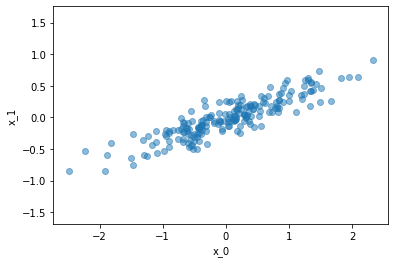

In [3]:
rng = np.random.RandomState(1)  # 난수 생성기 만들기
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T  #난수 생성
print(X.shape)

plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis('equal');
plt.xlabel('x_0')
plt.ylabel('x_1')

In [4]:
pca = PCA(n_components=2)
pca.fit(X)

len(pca.components_)

2

In [5]:
pca.components_[0] #unit vector

array([-0.94446029, -0.32862557])

In [6]:
pca.components_[1] #unit vector

array([-0.32862557,  0.94446029])

In [7]:
print(pca.components_)  #eigen-vector

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [8]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [9]:
pca.explained_variance_[0]/pca.explained_variance_[1]

41.26722658015474

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

0.7625315008826115 [-0.94446029 -0.32862557]
0.018477895513562572 [-0.32862557  0.94446029]


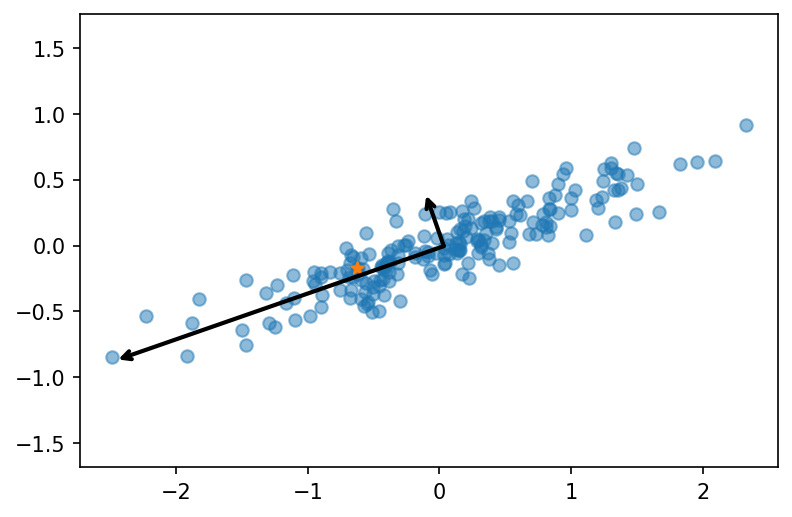

In [17]:
# plot data
plt.figure(dpi=150)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

plt.scatter(X[0, 0], X[0, 1], marker='*')
for length, vector in zip(pca.explained_variance_, pca.components_):
    print(length, vector)
    v = vector* np.sqrt(length)*3
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

## 과제
1)주축을 기준으로 데이터 회전

In [13]:
Xnew = pca.transform(X)

0.7625315008826115 [-0.94446029 -0.32862557]
0.018477895513562572 [-0.32862557  0.94446029]


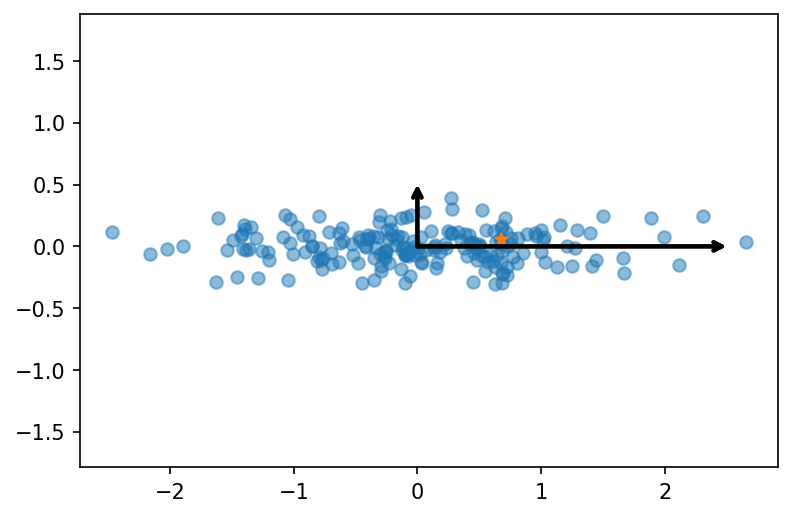

In [14]:
plt.figure(dpi=150)
plt.scatter(Xnew[:,0], Xnew[:, 1], alpha=0.5)
# plt.scatter(Xnew_pos[:,0],Xnew_pos[:,1], color = 'yellow')  #RGB[0.9290 0.6940 0.1250]
plt.scatter(Xnew[0, 0], Xnew[0, 1], marker='*')
for length, vector in zip(pca.explained_variance_, pca.components_):
    print(length, vector)
    v = vector* np.sqrt(length)*3
    draw_vector([0, 0], [2.5, 0] )   
    draw_vector([0, 0], [0, 0.5] )   

plt.axis('equal');

2)2차원 데이터를 분리(0을 기준으로 그룹화)

(200, 2)


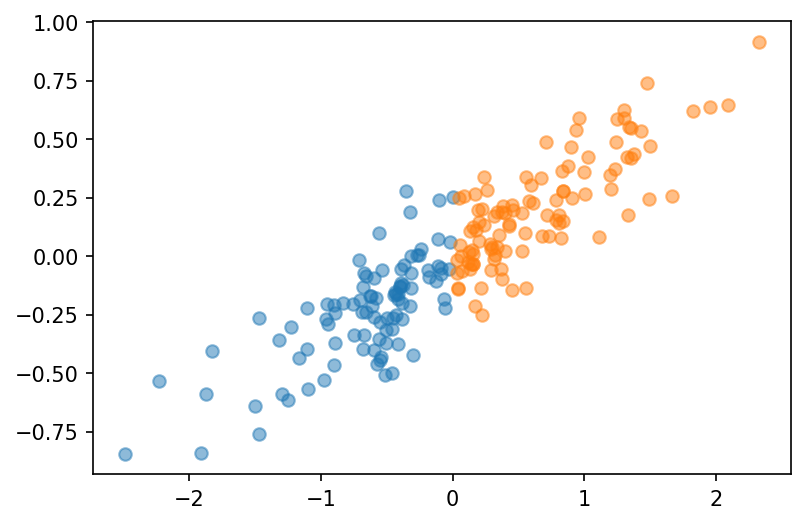

In [16]:
rng = np.random.RandomState(1)  # 난수 생성기 만들기
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T  #난수 생성
print(X.shape)

idx = X[:,0] > 0


X_pos = X[idx]
X_not_pos = X[~idx]

plt.figure(dpi=150)
plt.scatter(X_not_pos[:,0], X_not_pos[:, 1], alpha=0.5)
plt.scatter(X_pos[:,0], X_pos[:, 1], alpha=0.5)
